In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [ ]:
train.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,SalePrice
0,7,1820,1,240,1026,1133,2,8,1925,1950,184000
1,7,1646,1,240,918,918,2,7,1941,1950,164000
2,5,1316,2,484,926,926,1,6,1929,2001,130000
3,10,2402,3,672,3094,2402,2,10,2008,2008,555000
4,7,1253,2,402,1237,1253,2,6,1995,1996,176000


In [ ]:
train_data=train.values
Y=train_data[:,-1].reshape(train_data.shape[0],1)
X=train_data[:, :-1]

In [ ]:
test_data=test.values
Y_test=test_data[:,-1].reshape(test_data.shape[0],1)
X_test=test_data[:, :-1]

In [ ]:
X=np.vstack((np.ones((X.shape[0], )), X.T)).T
X_test=np.vstack((np.ones((X_test.shape[0], )), X_test.T)).T

In [ ]:
print("Shape of X_train :", X.shape)
print("Shape of Y_train :", Y.shape)
print("Shape of X_test :", X_test.shape)
print("Shape of Y_test :", Y_test.shape)

Shape of X_train : (1168, 11)
Shape of Y_train : (1168, 1)
Shape of X_test : (292, 11)
Shape of Y_test : (292, 1)


In [ ]:
def model(X,Y,learning_rate,iteration):
  m=Y.size
  theta=np.zeros((X.shape[1],1))
  cost_list=[]

  for i in range(iteration):

    y_pred=np.dot(X,theta)

    cost=(1/(2*m))*np.sum(np.square(y_pred - Y))

    d_theta=(1/m)*np.dot(X.T,y_pred - Y)
    theta=theta-learning_rate*d_theta

    cost_list.append(cost)

    if (i%(iteration/10)==0):
      print("Cost is: ",cost)

  return theta,cost_list

In [ ]:
epochs=200
rate=0.000000001
theta, cost_list = model(X,Y,learning_rate=rate,iteration=epochs)

Cost is:  19608941954.06892
Cost is:  12411147940.008059
Cost is:  8149690455.937409
Cost is:  5625394902.370254
Cost is:  4128833015.5952497
Cost is:  3240308914.2401843
Cost is:  2711531479.0392337
Cost is:  2395612108.1246004
Cost is:  2205651611.137401
Cost is:  2090240347.1481845


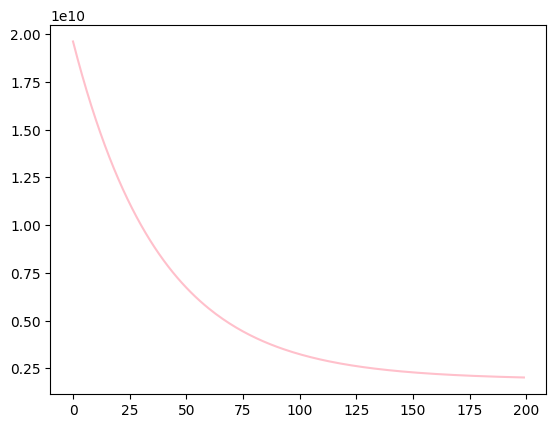

In [ ]:
rng=np.arange(0,epochs)
plt.plot(rng,cost_list,"pink")
plt.show()


In [ ]:
y_pred=np.dot(X_test,theta)
error=(1/X_test.shape[0])*np.sum(np.abs(y_pred - Y_test))

In [ ]:
print("Test error is: ", round(error,4)*100,"%")
print("Test Accuracy is: ", round(1-error,4)*100,"%")

Test error is:  4291074.77 %
Test Accuracy is:  -4290974.77 %
